In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
from matplotlib.colors import LogNorm
import seaborn as sns
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import ode
import scipy.ndimage
import glob
import os
from fractions import Fraction
import csv
import itertools

In [2]:
# colormapをカスタマイズする
from matplotlib.colors import LinearSegmentedColormap

def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

##### cmap for c_alpha_beta #####
cm = generate_cmap(['gray', 'black'])

def func_1(x, t, pars):
	#print(v_int)
	#print(solve.t+dt-solve.t)
	#print(solve.integrate(solve.t+dt)[0])
	return [(pars["r"]/(1+pars["d"]))*x[0] - pars["b"]*x[1]*x[0], pars["a"]*x[0] + pars["q"]*x[2] - pars["c"]*x[1], pars["u"]*x[0]]


In [3]:
v_int=0
dt = 0.1
t_end=30

pars1={"r":1,"d":0.5,"b":1,"a":1,"q":0.1,"c":0.5,"u":1}

# t1_list = np.arange(1, 9, 0.5)
# t3_list = np.arange(1, 16, 0.5)

# range_t1 =len(t1_list)
# t2_list = [k for k in t2_list if k >=2]
# print(range_t1)
# print(t2_list)
# start=t1_list[2]
# print(start)

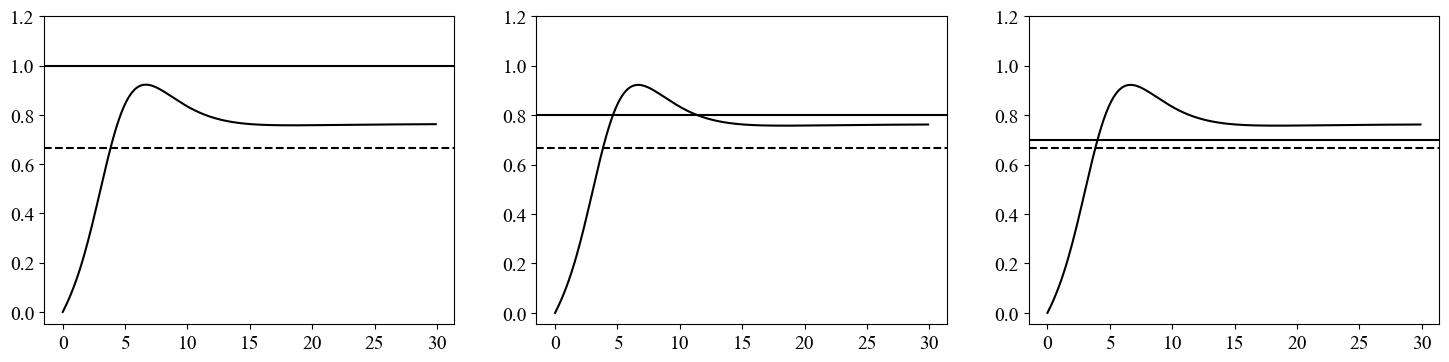

In [4]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams["mathtext.fontset"] = 'stix'
1
#calculation
start=0
end=8

#figの用意
fig, ax = plt.subplots(1, 3, figsize=(18, 4))

for i in range(3):
    if i == 0:
        pars1["r"]=1
        pars1["d"]=0.5
    elif i == 1:
        pars1["r"]=0.8
        pars1["d"]=0.2
    elif i == 2:
        pars1["r"]=0.7
        pars1["d"]=0.05
        
    r=pars1["r"]
    d=pars1["d"]
    b=pars1["b"]
    rbar=r/(1+d)
    
    df_V=pd.DataFrame()
    df_H=pd.DataFrame()
    df_M=pd.DataFrame()
    df_VHM=pd.DataFrame()
    df_plot=pd.DataFrame()
    x= [0.1,0,0]
    v_int=0
    list_t=[]
    list_V=[]
    list_H=[]
    list_M=[]

    ### drug ####
    ###  array  ####
    t0=np.arange(0,t_end,dt)
    y0 = odeint(func_1, (x[0],x[1],x[2]), t0, args= (pars1,))

    ###  list  ###
    t_list=list(t0)
    V_list=list(y0[:,0])
    H_list=list(y0[:,1])
    M_list=list(y0[:,2])
    
    df_VHM["t"]=t_list
    df_VHM["V"]=V_list
    df_VHM["H"]=H_list
    df_VHM["M"]=M_list

    df_VHM["bH"]=df_VHM["H"]*b
    x=df_VHM["t"]
    y= df_VHM["bH"]

    ##################
    csvname='fig.3_'+format(i+1, '01')+'.csv'
    df_VHM.to_csv(csvname)
    
    ax[i].plot(x, y, color = "black")
    ax[i].axhline(y=r, color = "black")
    ax[i].axhline(y=rbar, color = "black", linestyle = "dashed")
    ax[i].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2])
    

plt.show()
figname='fig.3.pdf'
fig.savefig(figname)